In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

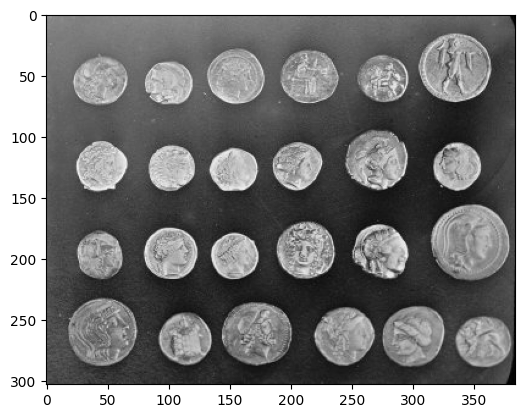

In [2]:
coins = data.coins()
plt.imshow(coins,cmap='gray')

# Segmentação baseada em deteção de bordas

/tmp/ipykernel_8196/3976627393.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(edges,cmap='gray')


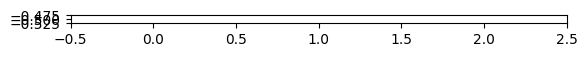

In [49]:
from skimage.feature import canny, blob_dog, corner_fast, corner_subpix, fisher_vector
edges = blob_dog(coins) #Aplicando o detector de bordas de canny
plt.imshow(edges,cmap='gray')

# Preenchendo as bordas detectadas

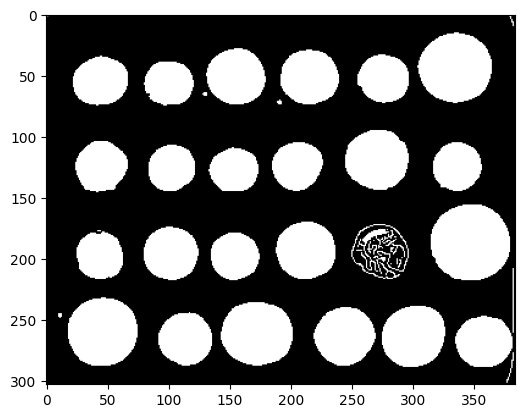

In [45]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges) # Preenche os buracos de regiões fechadas de imagens binárias
plt.imshow(fill_coins,cmap='gray')

# Remoção de pequenas regiões segmentadas de ruído

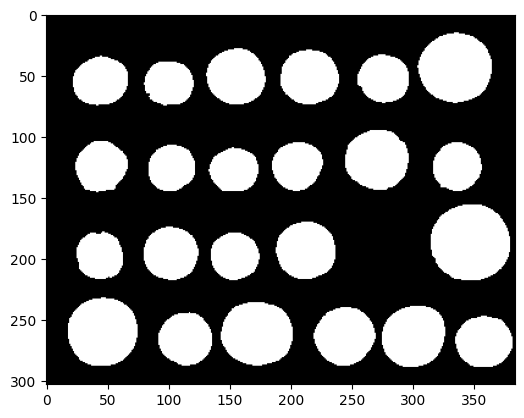

In [5]:
number_of_pixels = 150 #As regioes que tiverem menos de 150 pixels serão removidas
label_objects, nb_labels = ndi.label(fill_coins) #Criando labels com as diferentes regiões da imagem
new_image = np.zeros((label_objects.shape[0],label_objects.shape[1])) #Criando a nova imagem que receberá o resultado
for i in range(1,nb_labels):
    quant = np.sum(label_objects[:] == i) #Calculando o número de pixels da região de label i
    if(quant > number_of_pixels): #Fazendo a limiarização para remover as regiões com menos pixels que a variável
        new_image[label_objects[:] == i] = 1 #Os pixels da nova imagem receberão valor 1 nas posições que a região possui label igual a i
plt.imshow(new_image,cmap='gray')

Uma das moedas não foi corretamente segmentada, isto ocorreu devido a falhas na detecção do contorno.

# Gerando uma imagem contendo somente uma moeda

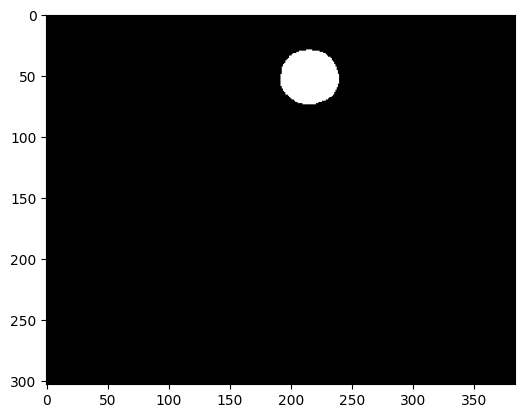

In [35]:
label = 3 #Label da moeda que será gerada
labeled_coins, _ = ndi.label(new_image) #Criando a imagem com labels 
one_coin = np.zeros((label_objects.shape[0],label_objects.shape[1])) #Essa imagem conterá somente uma moeda
one_coin[labeled_coins == label] = 1 #Os pixels corespondentes a região com o label contido nessa variável receberão valor 1
plt.imshow(one_coin,cmap='gray')

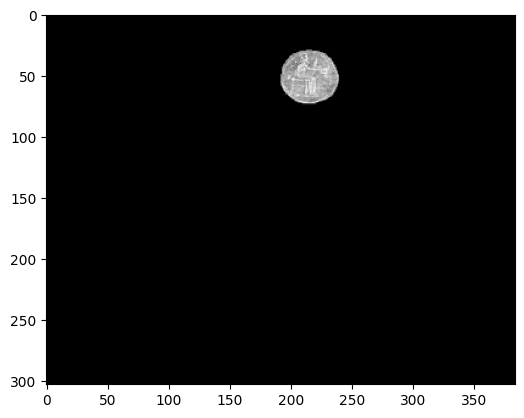

In [36]:
plt.imshow(coins*one_coin,cmap='gray')

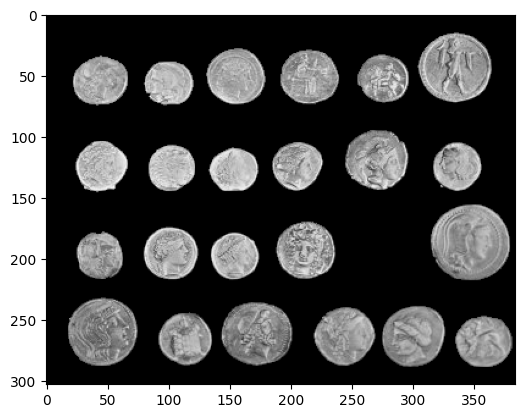

In [37]:
plt.imshow(new_image*coins,cmap='gray')